## Observations

In [16]:

# 1. In the tropical region from 20 to -20 latitude there are few points with low humidity 
#    suggesting that average humidity in the tropical regions is higher

# 2. Cloudiness data shows clustering of values in strata.  It's unlikely there is a weathr effect causing
#    cloudiness to converge around specific values, which are relatively evenly distributed across latitude.
#    it is more likely that cloudiness is reported by human beings who use gut feeling heuristics rather 
#    than actual measurements.

# 3. Despite randomization, there are more data points in the Northern Hemisphere than Southern.  It's hard to derive 
#    well founded comparisons of North v. South for this reason.  To compare, you might want to ensure an even 
#    distribution of North & South Points, and perhaps eliminate some of the extreme Northern points, as there is 
#    little comparable land mass in the Southern Hemisphere.  The temperature distrubtion clearly shows summer in the 
#    Northern Hemisphere--predictably. It also appears that there are more arid regions in the North v. South, but 
#    we'd need to control for even distribution of  data points to know for sure.


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [14]:
#Set variables
counter = 0
city_list = []
country_list=[]
# city + country then alaphabetical
cloudiness_list = []
date_list = []
unix_date_list = [] #in case we need it
humidity_list = []
lat_list =[]
lon_list = []
temp_list = []
windspeed_list = []

for city in cities:

# Get weather data
    lookup_url = url + "&q=" + city
    weather_response = requests.get(lookup_url)
    weather_json = weather_response.json()

    # some cities have no data. This gives a KeyError
    try: 
        # Get the lat, temp, humidity, cloudiness, windspeed from the response
        # It's more interesting to print result, so we'll report data
        # instead of url
        temp = weather_json['main']['temp_max']
        lat = weather_json['coord']['lat']
        humidity = weather_json['main']['humidity']/100
        cloudiness = weather_json['clouds']['all']/100
        windspeed = weather_json['wind']['speed']
        date = weather_json['dt']
        
        # Lets get a date we can read
        #convert unix time to readable time 
        readable_date = datetime.datetime.fromtimestamp(int(date)).strftime('%m/%d/%y %H:%M:%S')
        new_date = readable_date[:8]

       
        # set counter when we have success
        counter += 1

        # print out cities when there is data
        print(f"Processing Record [{counter}] | {city}")
        print ("lat: ", lat, " /Temp: ", temp, " /Humidity: ", humidity, " /Cloudiness: ", cloudiness, " /Windspeed: ", windspeed)

        city_list.append(city)
        country_list.append(weather_json['sys']['country'].upper()) #We can also append right to series

        cloudiness_list.append(cloudiness)
        date_list.append(new_date)
        unix_date_list.append(date)
        lat_list.append(lat)
        lon_list.append(weather_json['coord']['lon'])
        temp_list.append(temp)
        humidity_list.append(humidity)
        windspeed_list.append(windspeed)

        if counter == 500:
            break
            
    # Shows when we have no city data
    # We could edit the city list if we wanted to
    except KeyError:
        print (f"No data for {city}")
        if counter == 1:
            break

print(f"------------------------\nData Retrieval Complete\n-----------------------")
print(f"City count is {counter}")

Processing Record [1] | punta arenas
lat:  -53.16  /Temp:  42.8  /Humidity:  0.87  /Cloudiness:  0.0  /Windspeed:  11.41
Processing Record [2] | kodiak
lat:  39.95  /Temp:  86  /Humidity:  0.37  /Cloudiness:  0.01  /Windspeed:  9.17
Processing Record [3] | thinadhoo
lat:  0.53  /Temp:  85  /Humidity:  0.95  /Cloudiness:  0.32  /Windspeed:  20.94
Processing Record [4] | yellowknife
lat:  62.45  /Temp:  80.6  /Humidity:  0.42  /Cloudiness:  0.2  /Windspeed:  13.87
Processing Record [5] | ushuaia
lat:  -54.81  /Temp:  41  /Humidity:  0.6  /Cloudiness:  0.4  /Windspeed:  3.36
Processing Record [6] | kaina
lat:  12.64  /Temp:  80.6  /Humidity:  0.78  /Cloudiness:  0.0  /Windspeed:  5.82
Processing Record [7] | faanui
lat:  -16.48  /Temp:  80.68  /Humidity:  0.98  /Cloudiness:  0.64  /Windspeed:  13
Processing Record [8] | hobart
lat:  -42.88  /Temp:  44.6  /Humidity:  0.81  /Cloudiness:  0.75  /Windspeed:  5.82
Processing Record [9] | bredasdorp
lat:  -34.53  /Temp:  59  /Humidity:  0.93  /

No data for bengkulu
Processing Record [71] | talara
lat:  -4.58  /Temp:  75.2  /Humidity:  0.83  /Cloudiness:  0.0  /Windspeed:  10.87
Processing Record [72] | norman wells
lat:  65.28  /Temp:  80.6  /Humidity:  0.51  /Cloudiness:  0.2  /Windspeed:  3.36
Processing Record [73] | jamestown
lat:  -33.21  /Temp:  48.28  /Humidity:  0.98  /Cloudiness:  0.92  /Windspeed:  2.93
Processing Record [74] | zlatoust
lat:  55.17  /Temp:  58.45  /Humidity:  0.8  /Cloudiness:  0.0  /Windspeed:  1.92
No data for belushya guba
Processing Record [75] | rabat
lat:  34.02  /Temp:  69.8  /Humidity:  0.68  /Cloudiness:  0.2  /Windspeed:  5.82
No data for solovetskiy
Processing Record [76] | new norfolk
lat:  -42.78  /Temp:  44.6  /Humidity:  0.81  /Cloudiness:  0.75  /Windspeed:  5.82
Processing Record [77] | yulara
lat:  -25.24  /Temp:  44.6  /Humidity:  0.65  /Cloudiness:  0.0  /Windspeed:  10.87
Processing Record [78] | airai
lat:  -8.93  /Temp:  63.76  /Humidity:  0.93  /Cloudiness:  0.56  /Windspeed:

Processing Record [139] | georgetown
lat:  6.8  /Temp:  87.8  /Humidity:  0.66  /Cloudiness:  0.4  /Windspeed:  16.11
Processing Record [140] | grand gaube
lat:  -20.01  /Temp:  69.8  /Humidity:  0.68  /Cloudiness:  0.4  /Windspeed:  4.7
Processing Record [141] | thyboron
lat:  56.7  /Temp:  67.36  /Humidity:  0.78  /Cloudiness:  0.0  /Windspeed:  11.99
No data for vaitupu
No data for ondorhaan
Processing Record [142] | sajokaza
lat:  48.28  /Temp:  73.4  /Humidity:  0.69  /Cloudiness:  0.0  /Windspeed:  14.99
Processing Record [143] | sambava
lat:  -14.27  /Temp:  71.5  /Humidity:  1.0  /Cloudiness:  0.92  /Windspeed:  15.01
Processing Record [144] | nemuro
lat:  43.32  /Temp:  60.43  /Humidity:  1.0  /Cloudiness:  0.48  /Windspeed:  9.19
Processing Record [145] | lompoc
lat:  34.64  /Temp:  89.6  /Humidity:  0.68  /Cloudiness:  0.01  /Windspeed:  14.99
Processing Record [146] | the valley
lat:  18.22  /Temp:  86  /Humidity:  0.66  /Cloudiness:  0.2  /Windspeed:  17.22
Processing Reco

Processing Record [207] | thompson
lat:  55.74  /Temp:  78.8  /Humidity:  0.39  /Cloudiness:  0.75  /Windspeed:  8.05
No data for karkaralinsk
Processing Record [208] | altamira
lat:  -3.2  /Temp:  89.6  /Humidity:  0.59  /Cloudiness:  0.75  /Windspeed:  3.36
No data for kuche
Processing Record [209] | longyearbyen
lat:  78.22  /Temp:  41  /Humidity:  0.8  /Cloudiness:  0.75  /Windspeed:  17.22
Processing Record [210] | port hardy
lat:  50.7  /Temp:  57.2  /Humidity:  0.93  /Cloudiness:  0.9  /Windspeed:  5.82
No data for rostaq
Processing Record [211] | zambezi
lat:  -13.55  /Temp:  52.6  /Humidity:  0.68  /Cloudiness:  0.0  /Windspeed:  2.37
Processing Record [212] | noumea
lat:  -22.28  /Temp:  57.2  /Humidity:  0.93  /Cloudiness:  0.0  /Windspeed:  3.36
Processing Record [213] | radcliff
lat:  37.84  /Temp:  89.6  /Humidity:  0.48  /Cloudiness:  0.01  /Windspeed:  6.93
Processing Record [214] | doha
lat:  25.29  /Temp:  96.8  /Humidity:  0.53  /Cloudiness:  0.0  /Windspeed:  6.93
P

Processing Record [275] | avera
lat:  33.19  /Temp:  93.2  /Humidity:  0.43  /Cloudiness:  0.4  /Windspeed:  5.82
Processing Record [276] | aksha
lat:  50.28  /Temp:  65.74  /Humidity:  0.75  /Cloudiness:  0.36  /Windspeed:  4.72
Processing Record [277] | zlitan
lat:  32.47  /Temp:  75.37  /Humidity:  0.88  /Cloudiness:  0.0  /Windspeed:  6.73
Processing Record [278] | turki
lat:  51.98  /Temp:  68.53  /Humidity:  0.67  /Cloudiness:  0.36  /Windspeed:  7.74
Processing Record [279] | ust-nera
lat:  64.57  /Temp:  43.78  /Humidity:  1.0  /Cloudiness:  0.92  /Windspeed:  2.59
Processing Record [280] | kibala
lat:  9.11  /Temp:  75.2  /Humidity:  0.88  /Cloudiness:  0.0  /Windspeed:  4.7
Processing Record [281] | kwinana
lat:  -32.25  /Temp:  57.2  /Humidity:  1.0  /Cloudiness:  0.9  /Windspeed:  9.17
Processing Record [282] | masyaf
lat:  35.06  /Temp:  77  /Humidity:  0.78  /Cloudiness:  0.4  /Windspeed:  5.82
Processing Record [283] | shimoda
lat:  34.7  /Temp:  75.2  /Humidity:  0.73  

No data for kirya
Processing Record [344] | ugoofaaru
lat:  5.67  /Temp:  83.74  /Humidity:  0.96  /Cloudiness:  0.76  /Windspeed:  19.48
Processing Record [345] | mount gambier
lat:  -37.83  /Temp:  46.03  /Humidity:  0.88  /Cloudiness:  0.8  /Windspeed:  3.83
Processing Record [346] | mbekenyera
lat:  -10  /Temp:  69.61  /Humidity:  0.73  /Cloudiness:  0.0  /Windspeed:  4.5
Processing Record [347] | san juan
lat:  14.6  /Temp:  77  /Humidity:  1.0  /Cloudiness:  0.4  /Windspeed:  3.27
No data for mys shmidta
Processing Record [348] | santa isabel do rio negro
lat:  -0.41  /Temp:  78.7  /Humidity:  0.89  /Cloudiness:  0.64  /Windspeed:  4.38
Processing Record [349] | cartagena del chaira
lat:  1.33  /Temp:  71.14  /Humidity:  0.99  /Cloudiness:  1.0  /Windspeed:  2.93
Processing Record [350] | taebla
lat:  58.95  /Temp:  73.03  /Humidity:  0.53  /Cloudiness:  0.0  /Windspeed:  8.19
Processing Record [351] | lichuan
lat:  30.3  /Temp:  69.07  /Humidity:  0.92  /Cloudiness:  0.56  /Wind

lat:  64.17  /Temp:  48.2  /Humidity:  0.31  /Cloudiness:  0.75  /Windspeed:  25.28
Processing Record [414] | naze
lat:  5.43  /Temp:  75.2  /Humidity:  0.94  /Cloudiness:  0.75  /Windspeed:  2.24
Processing Record [415] | ust-kalmanka
lat:  52.12  /Temp:  60.43  /Humidity:  0.83  /Cloudiness:  0.68  /Windspeed:  2.37
Processing Record [416] | codrington
lat:  -28.95  /Temp:  43.33  /Humidity:  0.82  /Cloudiness:  0.48  /Windspeed:  2.59
Processing Record [417] | niamey
lat:  13.52  /Temp:  84.2  /Humidity:  0.62  /Cloudiness:  0.2  /Windspeed:  6.93
Processing Record [418] | kabare
lat:  -1.65  /Temp:  59.17  /Humidity:  1.0  /Cloudiness:  0.92  /Windspeed:  2.82
Processing Record [419] | haines junction
lat:  60.75  /Temp:  69.07  /Humidity:  0.45  /Cloudiness:  0.0  /Windspeed:  2.93
Processing Record [420] | altay
lat:  47.83  /Temp:  35.41  /Humidity:  0.7  /Cloudiness:  0.0  /Windspeed:  3.83
No data for lolua
Processing Record [421] | soldato-aleksandrovskoye
lat:  44.27  /Temp:

Processing Record [482] | palmares do sul
lat:  -30.26  /Temp:  60.8  /Humidity:  1.0  /Cloudiness:  0.9  /Windspeed:  9.17
Processing Record [483] | luorong
lat:  24.41  /Temp:  74.56  /Humidity:  0.97  /Cloudiness:  0.36  /Windspeed:  2.93
Processing Record [484] | rio gallegos
lat:  -51.62  /Temp:  42.8  /Humidity:  0.6  /Cloudiness:  0.0  /Windspeed:  10.29
Processing Record [485] | neiafu
lat:  -18.65  /Temp:  75.2  /Humidity:  0.73  /Cloudiness:  0.2  /Windspeed:  6.93
Processing Record [486] | touros
lat:  -5.2  /Temp:  79.24  /Humidity:  0.77  /Cloudiness:  0.32  /Windspeed:  18.81
No data for saleaula
Processing Record [487] | general roca
lat:  -39.03  /Temp:  51.8  /Humidity:  0.57  /Cloudiness:  0.0  /Windspeed:  10.29
No data for maloshuyka
Processing Record [488] | bajil
lat:  38.23  /Temp:  77.44  /Humidity:  0.49  /Cloudiness:  0.0  /Windspeed:  4.72
Processing Record [489] | snezhnogorsk
lat:  69.19  /Temp:  50  /Humidity:  0.93  /Cloudiness:  0.75  /Windspeed:  8.95
P

In [21]:
# Assemble all of our series into a dataframe
# Assign column names
weather_df = pd.DataFrame(city_list, columns = ['City'])
weather_df['Country']=country_list
weather_df['Cloudiness']=cloudiness_list
weather_df['Date']=date_list
weather_df['Humidity']=humidity_list
weather_df['Latitude']=lat_list
weather_df['Longitude']=lon_list
weather_df['Max Temp (F)']=temp_list
weather_df['Wind Speed']=windspeed_list

# Save data to csv
weather_df.to_csv("Output/random_city_weather.csv", index=False, header=True)

# Check the count of entries
weather_df.count()


City            500
Country         500
Cloudiness      500
Date            500
Humidity        500
Latitude        500
Longitude       500
Max Temp (F)    500
Wind Speed      500
dtype: int64

In [8]:
# Display the City dataframe
weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp (F),Wind Speed
0,punta arenas,CL,0.00,07/26/18,0.87,-53.16,-70.91,42.64,14.99
1,kodiak,US,0.01,07/26/18,0.39,39.95,-94.76,84.20,3.36
2,thinadhoo,MV,0.32,07/26/18,0.95,0.53,72.93,85.00,20.94
3,yellowknife,CA,0.20,07/26/18,0.42,62.45,-114.38,80.60,13.87
4,ushuaia,AR,0.75,07/26/18,0.56,-54.81,-68.31,42.80,13.67


In [9]:
# build a function to create scatter plots
def buildScatter(x_axis, y_axis, color): 
    
    #set scatter plot figure size
    plt.figure(figsize=(10,8))
    
    #create scatter plot by assigning x-axis and y-axis
    plt.scatter(weather_df[x_axis], weather_df[y_axis], color=color, 
                s=30, linewidth=0.4, edgecolors='black', alpha=1)

    
    #add title to scatter plot
    plt.title("City " + x_axis + " vs " + y_axis + " (" + new_date + ") ", fontsize=15, pad=20)
    
    #add gridlines to scatter plot
    plt.grid(True)
    
    #add labels to x-axis and y-axis
    plt.xlabel(x_axis, fontsize=12)
    plt.ylabel(y_axis, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

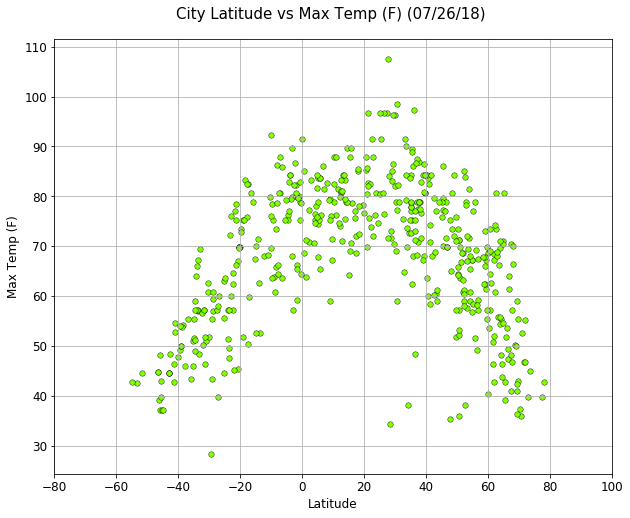

In [10]:
#creating scatter plot for latitude vs. Max
buildScatter("Latitude", "Max Temp (F)", "chartreuse")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Images/Latitude_Temperature.png")
plt.show()

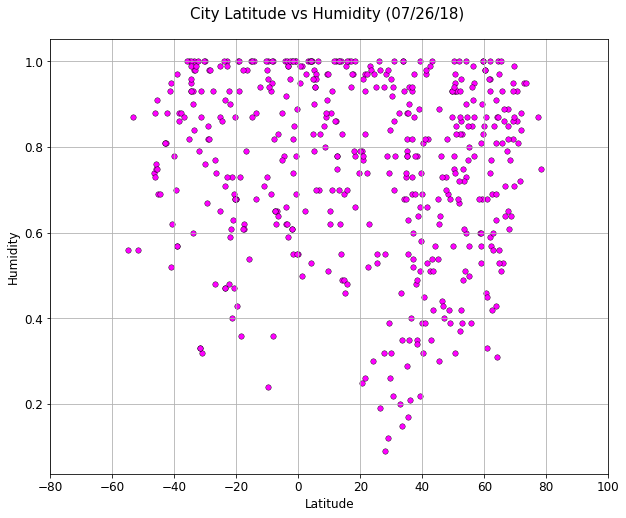

In [17]:
#creating scatter plot for latitude vs. Max
buildScatter("Latitude", "Humidity", "fuchsia")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Images/Latitude_Humidity.png")
plt.show()

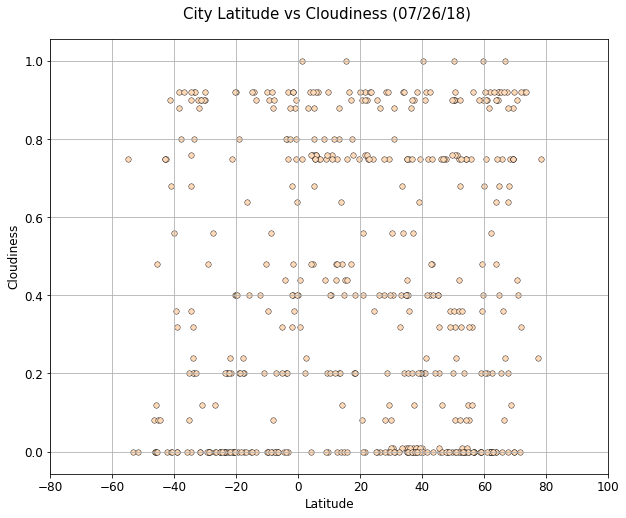

In [18]:
#creating scatter plot for latitude vs. Max
buildScatter("Latitude", "Cloudiness", "peachpuff")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Images/Latitude_Cloudiness.png")
plt.show()

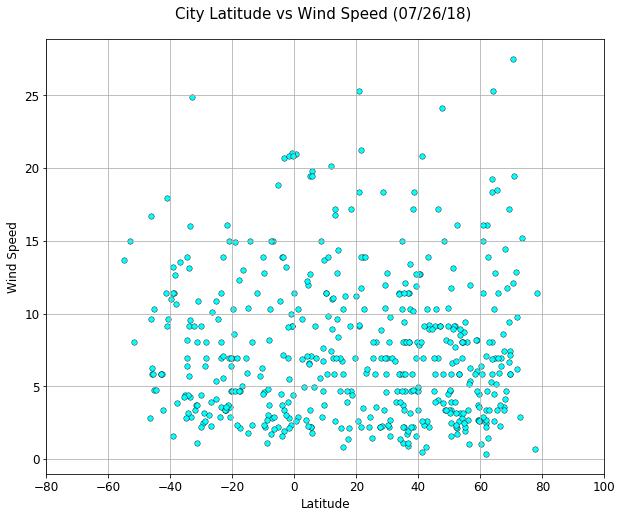

In [19]:
#creating scatter plot for latitude vs. Max
buildScatter("Latitude", "Wind Speed", "aqua")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Images/Latitude_Windspeed.png")
plt.show()